# O'Gara Capstone Project - Google Merchandise Store Revenue Prediction

# Abstract:

#### Objective of competition

In this Kaggle competition, we're challenged to analyze a Google Merchandise Store customer dataset to predict revenue per customer. 

Each row in the dataset is one visit to the store. We are predicting the natural log of the sum of all transactions per user.

https://www.kaggle.com/c/ga-customer-revenue-prediction

### What question are we trying to answer for the purpose of this project?

Can we predict the revenue of each visit to the Google Merchandise Store? (predicting the revenue for each row of data)

Can we make a recommendation to the owner of this Google Merchandise Store about what features/variables are important when predicting the revenue of each session?

#### Features/independent variables:
fullVisitorId- A unique identifier for each user of the Google Merchandise Store.

channelGrouping - The channel via which the user came to the Store.

date - The date on which the user visited the Store.

device - The specifications for the device used to access the Store.

geoNetwork - This section contains information about the geography of the user.

socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".

totals - This section contains aggregate values across the session.

trafficSource - This section contains information about the Traffic Source from which the session originated.

visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.

visitNumber - The session number for this user. If this is the first session, then this is set to 1.

visitStartTime - The timestamp (expressed as POSIX time).

hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.

customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

totals - This set of columns mostly includes high-level aggregate data.

#### Label/Target variable: 

totals.transactionRevenue - 
We are predicting the natural log of the transaction revenue for each visit to the Google Merchandise Store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pandas.io.json import json_normalize
import sys
import csv

## OSEMN Methodology

### Obtain the data

In [ ]:
#importing required modules
from zipfile import ZipFile

#specifying the zip file name
file_name = "ga-customer-revenue-prediction.zip"

#opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    #printing all the contents of the zip file
    zip.printdir()
    
    #extract the files you want
    print('extracting all the files now....')
    zip.extract('train.csv')
    zip.extract('test.csv')
    print('done!')

In [ ]:
#function for transforming the 4 columns in a JSON format to a flattened format that can be used in a pandas dataframe

def load_df(csv_path='train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'},
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [ ]:
%%time
df_train = load_df()

In [ ]:
%%time
df_test = load_df('test.csv')

In [ ]:
#make two new csv files that have the JSON format cleaned up 
%%time
df_train.to_csv("train-flattened.csv", index=False)
df_test.to_csv("test-flattened.csv", index=False)

## restart notebook from here**

## Scrub the data and initial exploration

In [2]:
#read in the two new csv files
df_train = pd.read_csv('train-flattened.csv')
df_test = pd.read_csv('test-flattened.csv')

C:\Users\Thomas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Thomas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_train.nunique()

channelGrouping                                           8
date                                                    366
fullVisitorId                                        723803
sessionId                                            902755
socialEngagementType                                      1
visitId                                              886303
visitNumber                                             384
visitStartTime                                       887159
device.browser                                           54
device.browserVersion                                     1
device.browserSize                                        1
device.operatingSystem                                   20
device.operatingSystemVersion                             1
device.isMobile                                           2
device.mobileDeviceBranding                               1
device.mobileDeviceModel                                  1
device.mobileInputSelector              

In [5]:
#any column that has one unique value can be dropped here
for column in df_train.columns:
    if len(df_train[column].unique()) == 1:
        df_train.drop(column, inplace=True, axis=1)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 36 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null int64
fullVisitorId                                   903653 non-null object
sessionId                                       903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null int64
visitStartTime                                  903653 non-null int64
device.browser                                  903653 non-null object
device.operatingSystem                          903653 non-null object
device.isMobile                                 903653 non-null bool
device.deviceCategory                           903653 non-null object
geoNetwork.continent                            903653 non-null object
geoNetwork.subContinent                    

### only 11,515 out of 903,653 rows (~1.274%) have transactionRevenue - take a look at label

### Explore distribution of label with some visualizations

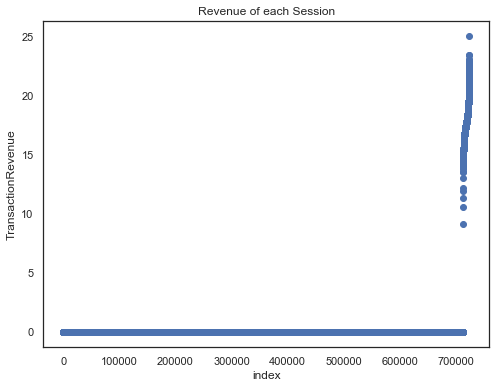

In [157]:
#think about how to group by fullVisitorId to focus on revenue per user 
gdf = df_train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.title('Revenue of each Session')
plt.show()

Text(0.5, 1.0, 'Distribuition of Revenue Log')

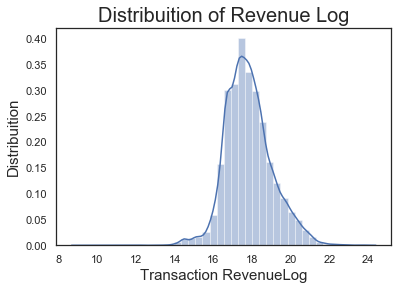

In [127]:
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) #seting the title and size of font

looks pretty normally distributed

In [129]:
from scipy.stats import kurtosis
from scipy.stats import skew
print('Excess kurtosis of normal distribution (should be 0): {}'.format(
    kurtosis(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"])))
print( 'Skewness of normal distribution (should be 0): {}'.format(
    skew((df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"]))))

Excess kurtosis of normal distribution (should be 0): 1019.8633054921306
Skewness of normal distribution (should be 0): 25.71935171056067


#### Explore & Replace the NaNs

In [8]:
#now lets look at null values:
df_train.isnull().sum()

channelGrouping                                      0
date                                                 0
fullVisitorId                                        0
sessionId                                            0
visitId                                              0
visitNumber                                          0
visitStartTime                                       0
device.browser                                       0
device.operatingSystem                               0
device.isMobile                                      0
device.deviceCategory                                0
geoNetwork.continent                                 0
geoNetwork.subContinent                              0
geoNetwork.country                                   0
geoNetwork.region                                    0
geoNetwork.metro                                     0
geoNetwork.city                                      0
geoNetwork.networkDomain                             0
totals.hit

In [9]:
#explore value_counts for the columns with a lot of NaNs
for column in df_train.columns[-10:-1]:
    print(column, '\n', '\n', df_train[column].value_counts(), '\n')

trafficSource.keyword 
 
 (not provided)                                      366363
6qEhsCssdK0z36ri                                     11503
(Remarketing/Content targeting)                       2298
1hZbAqLCbjwfgOH7                                      2264
google merchandise store                              2209
Google Merchandise                                    1648
google store                                          1277
youtube                                                568
(User vertical targeting)                              489
1X4Me6ZKNV0zg-jV                                       467
(automatic matching)                                   427
+google +store                                         377
+Google +Merchandise                                   352
(content targeting)                                    299
+google +merchandise +store                            258
YouTube Merchandise                                    254
youtube merch                 

trafficSource.adwordsClickInfo.gclId 
 
 Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3ZdwYO8GTsjiBFd5MPHStZa9y_9NCrI8X97oaAglc8P8HAQ      70
Cj0KEQjw1ee_BRD3hK6x993YzeoBEiQA5RH_BEA562M9tvl_mtnAFvtDnDqOQRp1RvxMMgwjcX1LAfwaAj4o8P8HAQ      41
CJH1vbf94M8CFUElgQodyakHgQ                                                                      29
Cj0KEQiAw_DEBRChnYiQ_562gsEBEiQA4LcssmB_RWgvpPnltzlzj5rGwqx5lk87wC5CjfcqzneNZewaAiAp8P8HAQ      27
CjwKEAiAj7TCBRCp2Z22ue-zrj4SJACG7SBEJui6ggr6ocA-eDC2-lX7W1m5IA1c_qNbzwZVTqUanxoCb5rw_wcB        24
CN_u9PaVhdACFcNahgodTCQAjw                                                                      22
CjwKEAiAxKrFBRDm25f60OegtwwSJABgEC-Z0_DLPcXHm1ZTqlR1YWeWXU875yaqwupt7pGMgFEZThoCeEzw_wcB        21
CNHp7Nf2ytMCFVlWDQod_IoL5A                                                                      20
CjwKEAiAvs7CBRC24rao6bGCoiASJABaCt5DtalFxcoSsvr2E2adUhx6z6OE0KAuVtqKzl-BcVN1-hoCNlrw_wcB        20
CjwKEAjw387JBRDPtJePvOej8kASJADkV9TLLYm88mDQieFBbZeS2hrQ7p-uHNZo45H2

In [10]:
#keep this column and fill NaN w/ 0
df_train['totals.bounces'].value_counts()

1.0    450630
Name: totals.bounces, dtype: int64

In [11]:
#keep column
df_train['totals.newVisits'].value_counts()

1.0    703060
Name: totals.newVisits, dtype: int64

In [12]:
#drop the columns that don't add any value - 6 with mostly NaNs that can't be fixed 
df_train.drop(['trafficSource.keyword', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.page', 
               'trafficSource.adwordsClickInfo.gclId','trafficSource.adwordsClickInfo.adNetworkType', 
               'trafficSource.adContent', 'trafficSource.campaignCode', 'trafficSource.adwordsClickInfo.slot'], 
              axis=1, inplace=True)

In [13]:
#fill the Na/NaNs
df_train['totals.pageviews'].fillna(1, inplace=True)
df_train['totals.newVisits'].fillna(0, inplace=True)
df_train['totals.bounces'].fillna(0, inplace=True)
df_train['totals.transactionRevenue'].fillna(0.0, inplace=True)
df_train['trafficSource.isTrueDirect'].fillna(False, inplace=True)
df_train['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) #debating dropping this column altogether

In [14]:
for column in df_train.columns:
    print(column, '\n', '\n', df_train[column].value_counts(), '\n')

channelGrouping 
 
 Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Affiliates         16403
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64 

date 
 
 20161128    4807
20161115    4685
20161114    4466
20161130    4435
20161026    4375
20161129    4337
20161116    4334
20161004    4322
20161205    4265
20170426    4224
20161201    4200
20161027    4162
20161121    4143
20161117    4074
20161024    4063
20161110    4055
20161103    4014
20161102    3960
20161122    3942
20161108    3899
20161025    3842
20161107    3832
20161031    3827
20161123    3805
20161028    3791
20161005    3770
20161124    3770
20161125    3759
20161020    3755
20161109    3752
            ... 
20160813    1596
20170430    1594
20161001    1589
20161226    1586
20170115    1576
20170429    1566
20170611    1555
20170204    1549
20170423    1548
20170610    1545
20170604    1534
20170114    1526
20

device.browser 
 
 Chrome                                         620364
Safari                                         182245
Firefox                                         37069
Internet Explorer                               19375
Edge                                            10205
Android Webview                                  7865
Safari (in-app)                                  6850
Opera Mini                                       6139
Opera                                            5643
UC Browser                                       2427
YaBrowser                                        2096
Coc Coc                                           727
Amazon Silk                                       561
Android Browser                                   553
Mozilla Compatible Agent                          374
MRCHROME                                          263
Maxthon                                           246
BlackBerry                                        184
Nintendo 

geoNetwork.metro 
 
 not available in demo dataset                508229
(not set)                                    201766
San Francisco-Oakland-San Jose CA             95913
New York NY                                   26917
London                                        12571
Los Angeles CA                                 9995
Seattle-Tacoma WA                              7642
Chicago IL                                     7585
Austin TX                                      3790
Washington DC (Hagerstown MD)                  3380
Boston MA-Manchester NH                        2628
Houston TX                                     2475
Atlanta GA                                     2463
Detroit MI                                     2403
Roanoke-Lynchburg VA                           2227
Dallas-Ft. Worth TX                            2012
San Diego CA                                   1364
Portland OR                                    1319
Pittsburgh PA                              

totals.transactionRevenue 
 
 0.000000e+00    892138
1.699000e+07       256
1.899000e+07       189
3.359000e+07       187
4.479000e+07       170
1.359000e+07       135
5.599000e+07       122
1.999000e+07       116
1.599000e+07        98
1.519000e+07        93
1.919000e+07        92
1.099000e+07        84
5.999000e+07        81
2.499000e+07        77
7.999000e+07        65
2.719000e+07        64
2.718000e+07        62
3.398000e+07        54
3.999000e+07        51
6.718000e+07        46
1.990000e+06        44
2.878000e+07        40
2.199000e+07        40
3.039000e+07        39
3.598000e+07        39
1.759000e+07        38
3.038000e+07        37
1.299000e+07        37
2.798000e+07        37
3.199000e+07        37
                 ...  
3.222400e+08         1
8.060000e+07         1
8.062000e+07         1
8.063000e+07         1
1.063200e+08         1
3.196100e+08         1
8.066000e+07         1
3.226600e+08         1
3.227400e+08         1
8.072000e+07         1
8.074000e+07         1
8.07

#### Replace categorical rows with a low number of occurances with "other" so there aren't too many columns when we one-hot encode the categorical columns

In [15]:
###function to reduce the categorical columns with a lot of classes 
def reduce_categories(column, keep_list):
    
    #create a list of all the possible categories within the column
    column_list = list(df_train[column].unique())
    
    #remove the categories you want to remain in your column - the most frequent categories within the column
    for category in keep_list:
        column_list.remove(category)
        
    #replace all of the less frequent categories with 'other'
    df_train[column].replace(to_replace=column_list, value='other', inplace=True)
    
    #check to see if the function worked correctly
    display(df_train[column].value_counts())

In [16]:
source_list = ['google', 'youtube.com', '(direct)', 'mall.googleplex.com', 'Partners']
reduce_categories('trafficSource.source', source_list)

google                 400788
youtube.com            212602
(direct)               143028
mall.googleplex.com     66416
other                   64408
Partners                16411
Name: trafficSource.source, dtype: int64

In [17]:
browser_list = ['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge', 'Android Webview', 'Safari (in-app)']
reduce_categories('device.browser', browser_list)

Chrome               620364
Safari               182245
Firefox               37069
other                 19680
Internet Explorer     19375
Edge                  10205
Android Webview        7865
Safari (in-app)        6850
Name: device.browser, dtype: int64

In [18]:
os_list = ['Windows', 'Macintosh', 'Android', 'iOS', 'Linux', 'Chrome OS']
reduce_categories('device.operatingSystem', os_list)

Windows      350072
Macintosh    253938
Android      123892
iOS          107665
Linux         35034
Chrome OS     26337
other          6715
Name: device.operatingSystem, dtype: int64

In [19]:
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Vietnam']
reduce_categories('geoNetwork.country', country_list)

other             399909
United States     364744
India              51140
United Kingdom     37393
Canada             25869
Vietnam            24598
Name: geoNetwork.country, dtype: int64

In [20]:
subcontinent_list = ['Northern America', 'Southeast Asia', 'Southern Asia' ,'Western Europe', 'Northern Europe',
                     'Eastern Asia', 'Eastern Europe', 'South America','Western Asia' ,'Southern Europe' ,'Central America',
                     'Australasia']
reduce_categories('geoNetwork.subContinent', subcontinent_list)

Northern America    390657
Southeast Asia       77800
Southern Asia        59321
Western Europe       59114
Northern Europe      58168
Eastern Asia         46919
Eastern Europe       45249
South America        41731
Western Asia         38443
Southern Europe      35780
other                19995
Central America      15583
Australasia          14893
Name: geoNetwork.subContinent, dtype: int64

#### Drop the columns that have mostly useless rows of data (700k+ rows of non-data)

In [21]:
df_train.drop(['trafficSource.campaign', 'geoNetwork.networkDomain', 'geoNetwork.city', 'geoNetwork.metro',
              'geoNetwork.region'], axis=1, inplace=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 23 columns):
channelGrouping                             903653 non-null object
date                                        903653 non-null int64
fullVisitorId                               903653 non-null object
sessionId                                   903653 non-null object
visitId                                     903653 non-null int64
visitNumber                                 903653 non-null int64
visitStartTime                              903653 non-null int64
device.browser                              903653 non-null object
device.operatingSystem                      903653 non-null object
device.isMobile                             903653 non-null bool
device.deviceCategory                       903653 non-null object
geoNetwork.continent                        903653 non-null object
geoNetwork.subContinent                     903653 non-null object
geoNetwork.country      

In [23]:
#convert date to date_time object
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y%m%d')

#turn visitStartTime (expressed as POSIX time) into a date_time object
df_train['visitStartTime'] = pd.to_datetime(df_train['visitStartTime'], unit='s')

In [24]:
#use date_time objects to create "day of the week" and "month" and "hour" columns
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train['month'] = df_train['date'].dt.month_name()
#df_train['hour'] = df_train['visitStartTime'].dt.hour.apply(str)

#drop date and visitStartTime column
df_train.drop(['date', 'visitStartTime'], axis=1, inplace=True)

In [25]:
#one hot encode categorical variables
#some categorical variables have a ton of smaller categories - how do I handle this?
#one-hot encode - NaNs are ignored here
dummies = pd.get_dummies(df_train[['channelGrouping', 'device.browser', 'device.operatingSystem',
                                  'device.isMobile', 'device.deviceCategory', 'geoNetwork.continent',
                                   'geoNetwork.country', 'geoNetwork.subContinent','trafficSource.source', 
                                   'trafficSource.medium','trafficSource.isTrueDirect',
                                   'trafficSource.adwordsClickInfo.isVideoAd','day_of_week', 'month']], 
                         drop_first=True)

#check out the dummies
display(dummies.head())
display(dummies.info())

,device.isMobile,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.isVideoAd,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,False,False,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,False,False,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,False,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,False,False,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,True,True,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 75 columns):
device.isMobile                             903653 non-null bool
trafficSource.isTrueDirect                  903653 non-null bool
trafficSource.adwordsClickInfo.isVideoAd    903653 non-null bool
channelGrouping_Affiliates                  903653 non-null uint8
channelGrouping_Direct                      903653 non-null uint8
channelGrouping_Display                     903653 non-null uint8
channelGrouping_Organic Search              903653 non-null uint8
channelGrouping_Paid Search                 903653 non-null uint8
channelGrouping_Referral                    903653 non-null uint8
channelGrouping_Social                      903653 non-null uint8
device.browser_Chrome                       903653 non-null uint8
device.browser_Edge                         903653 non-null uint8
device.browser_Firefox                      903653 non-null uint8
device.browser_Internet Explorer  

None

In [26]:
df_train_new = pd.concat([df_train, dummies], axis=1)

df_train_new.drop(['channelGrouping', 'device.browser', 'device.operatingSystem','device.isMobile', 'device.deviceCategory',
                   'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.subContinent', 'trafficSource.source', 
                   'trafficSource.medium','trafficSource.isTrueDirect', 'trafficSource.adwordsClickInfo.isVideoAd',
                   'day_of_week', 'month'], 
                  axis=1, inplace=True)

df_train_new.head()

,fullVisitorId,sessionId,visitId,visitNumber,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,channelGrouping_Affiliates,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1,1.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,377306020877927890,377306020877927890_1472880147,1472880147,1,1,1.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1,1.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1,1.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,27294437909732085,27294437909732085_1472822600,1472822600,2,1,1.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 81 columns):
fullVisitorId                               903653 non-null object
sessionId                                   903653 non-null object
visitId                                     903653 non-null int64
visitNumber                                 903653 non-null int64
totals.hits                                 903653 non-null int64
totals.pageviews                            903653 non-null float64
totals.bounces                              903653 non-null float64
totals.newVisits                            903653 non-null float64
totals.transactionRevenue                   903653 non-null float64
channelGrouping_Affiliates                  903653 non-null uint8
channelGrouping_Direct                      903653 non-null uint8
channelGrouping_Display                     903653 non-null uint8
channelGrouping_Organic Search              903653 non-null uint8
channelGrouping_Paid 

### Explore the data more using additional visualizations

In [28]:
column_list = list(df_train.columns)
column_list.remove('fullVisitorId')
column_list.remove('sessionId')
column_list.remove('visitId')
column_list.remove('totals.transactionRevenue')
column_list

['channelGrouping',
 'visitNumber',
 'device.browser',
 'device.operatingSystem',
 'device.isMobile',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'totals.hits',
 'totals.pageviews',
 'totals.bounces',
 'totals.newVisits',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.isTrueDirect',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'day_of_week',
 'month']

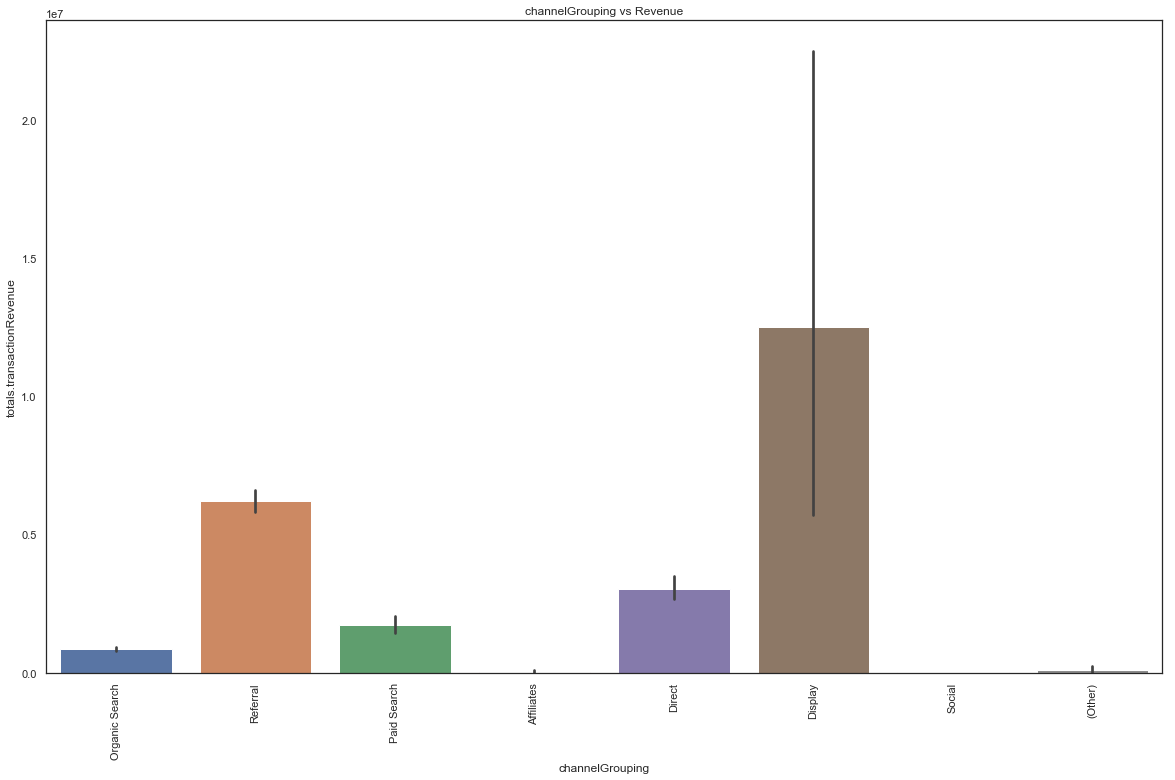

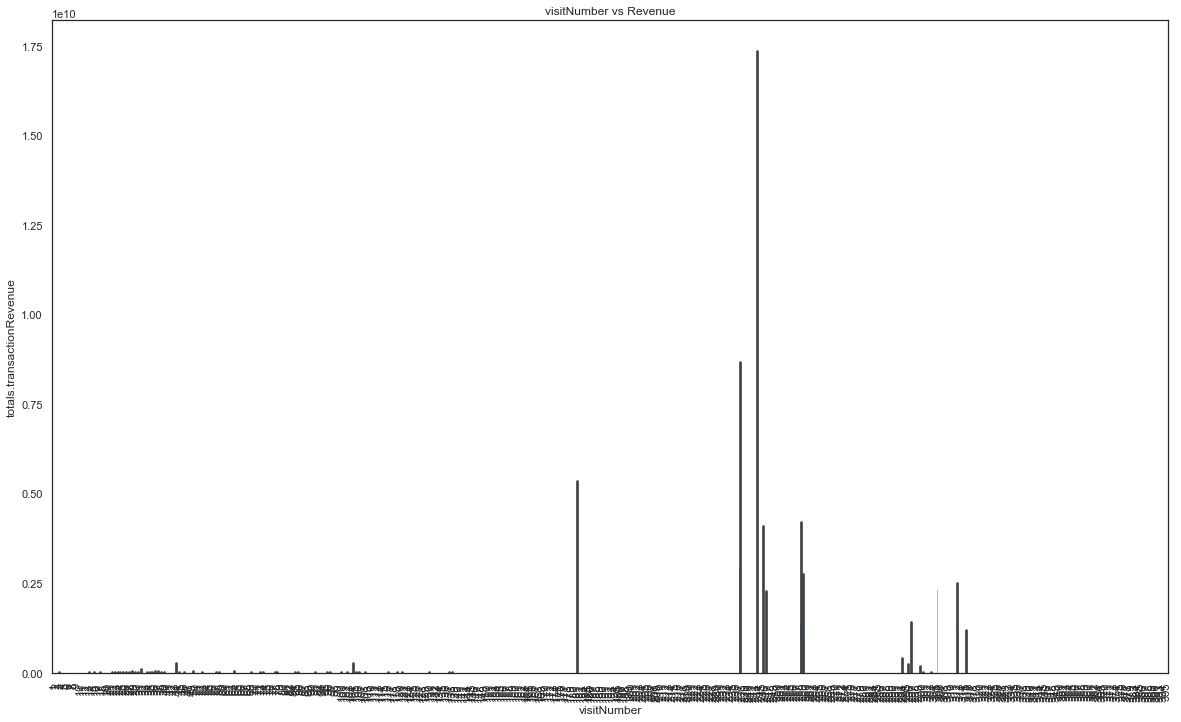

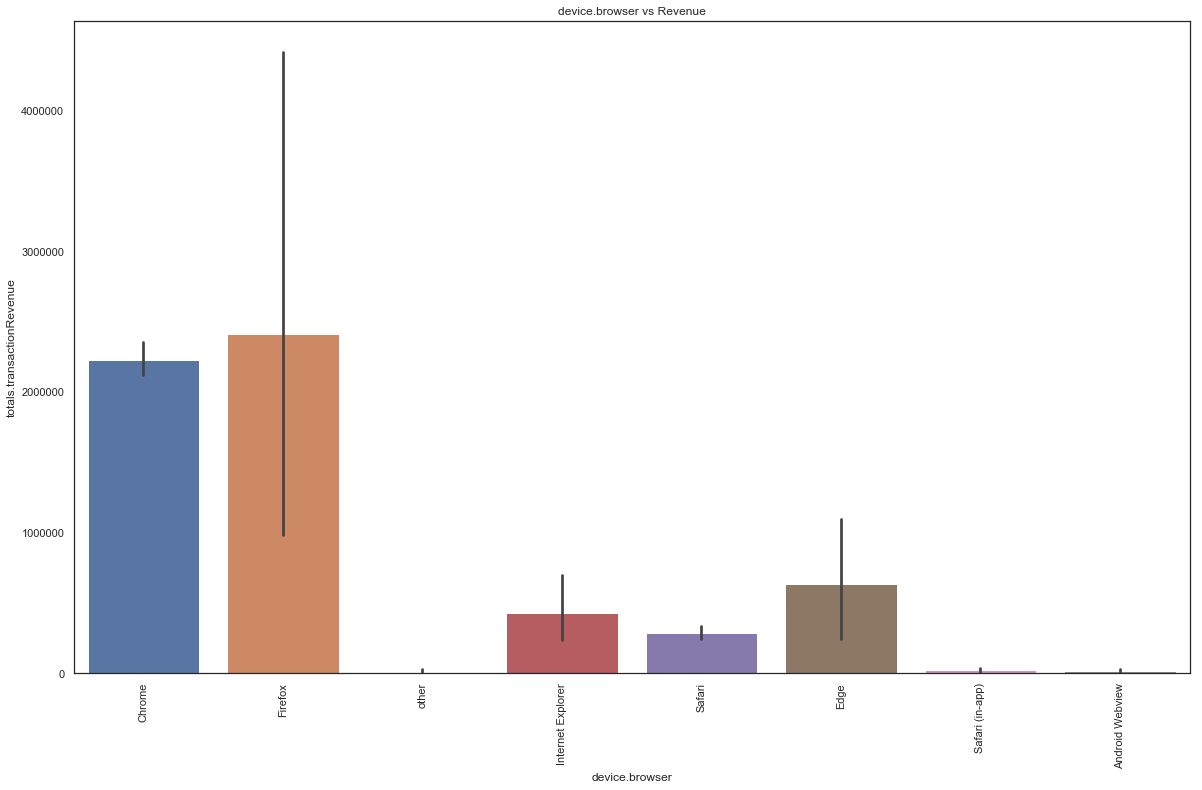

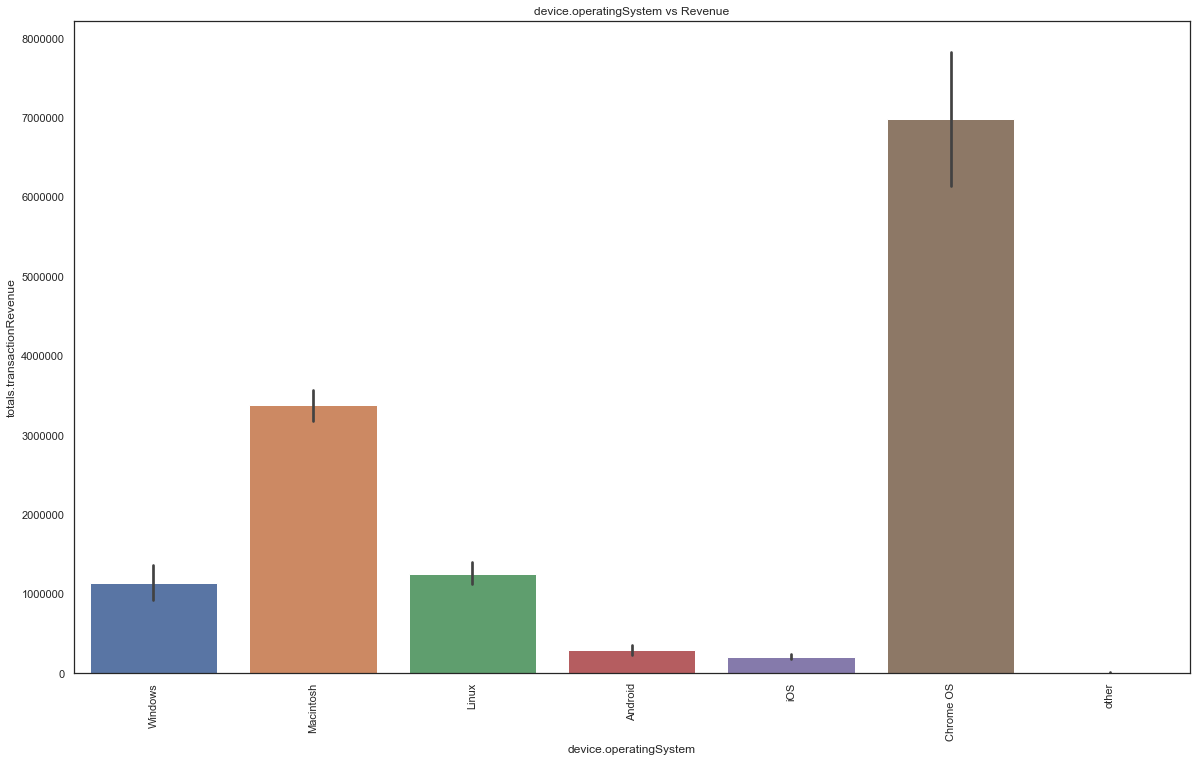

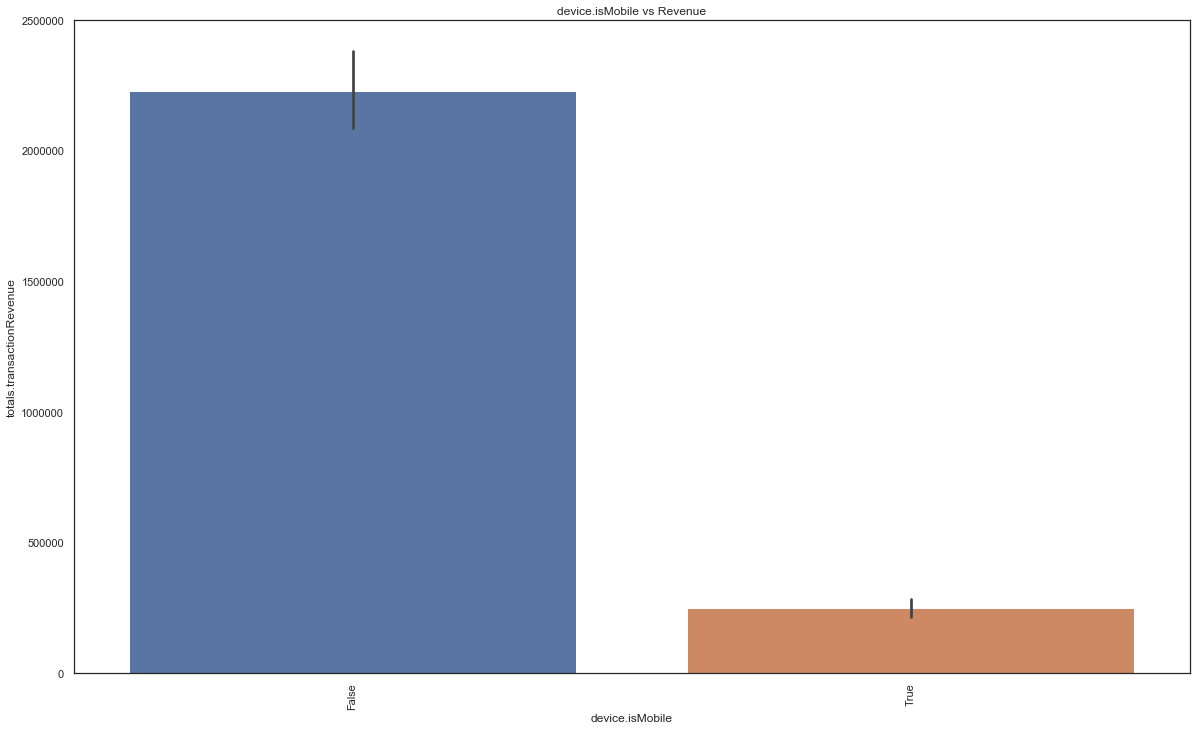

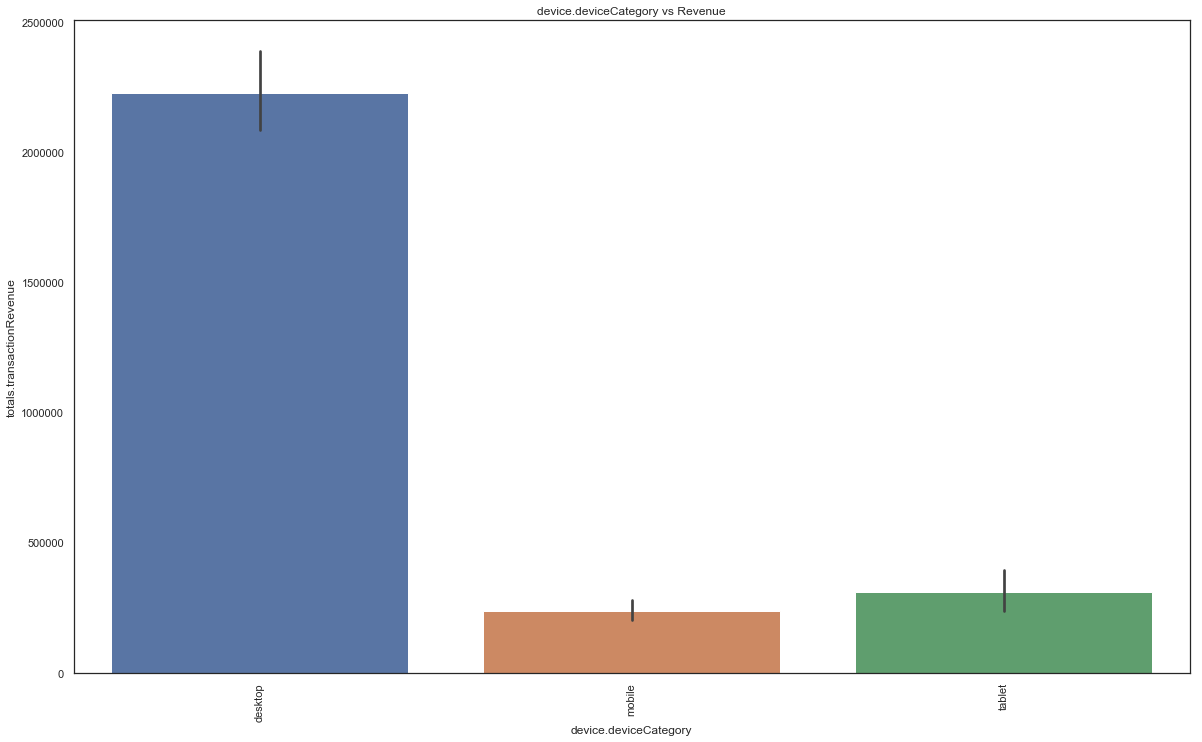

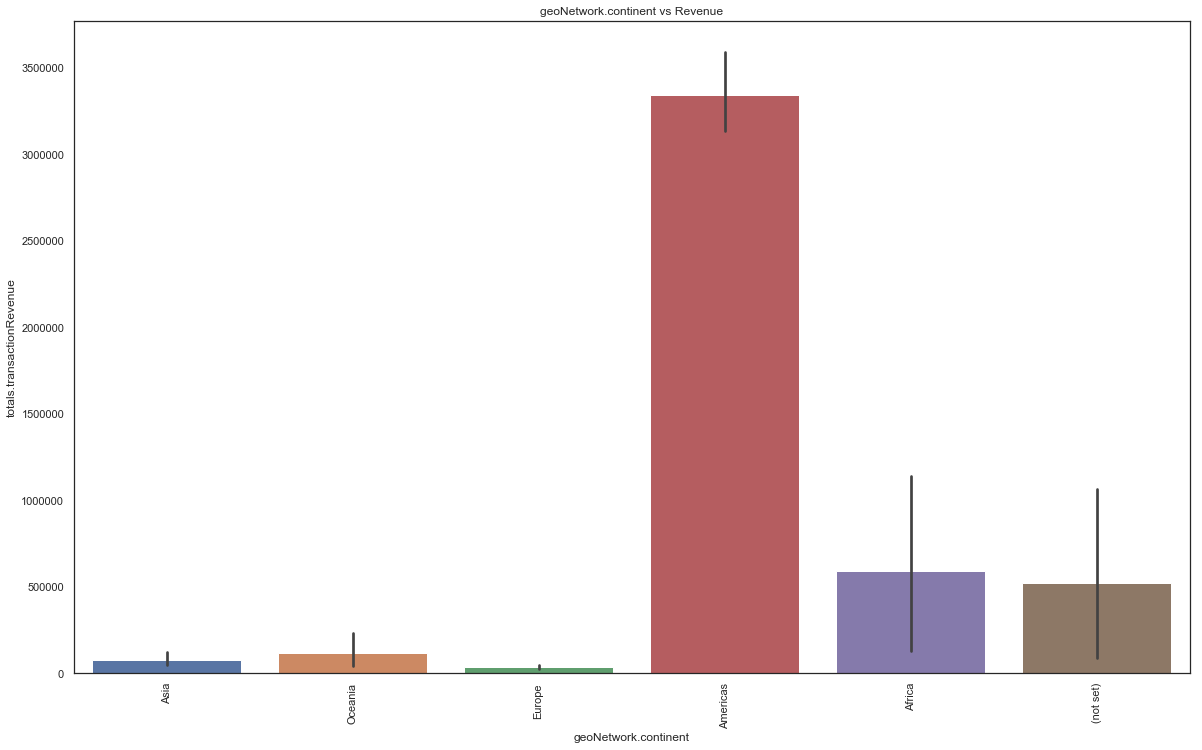

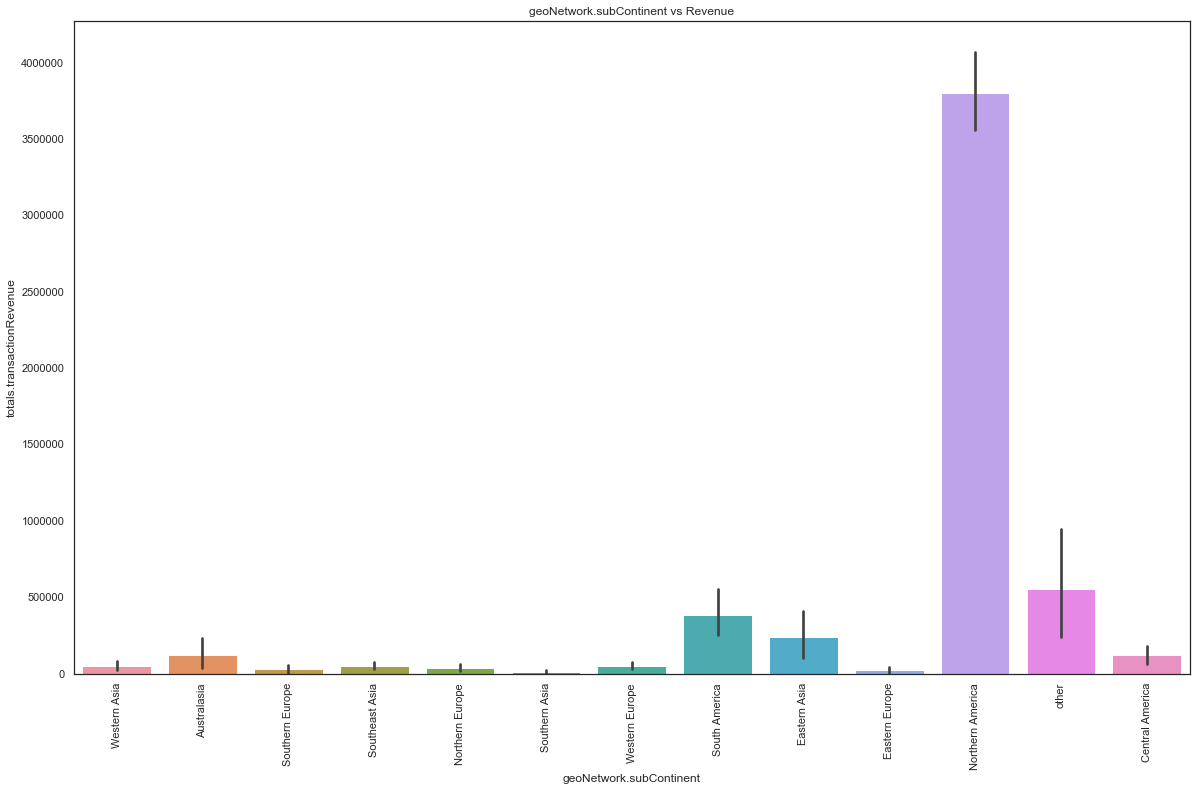

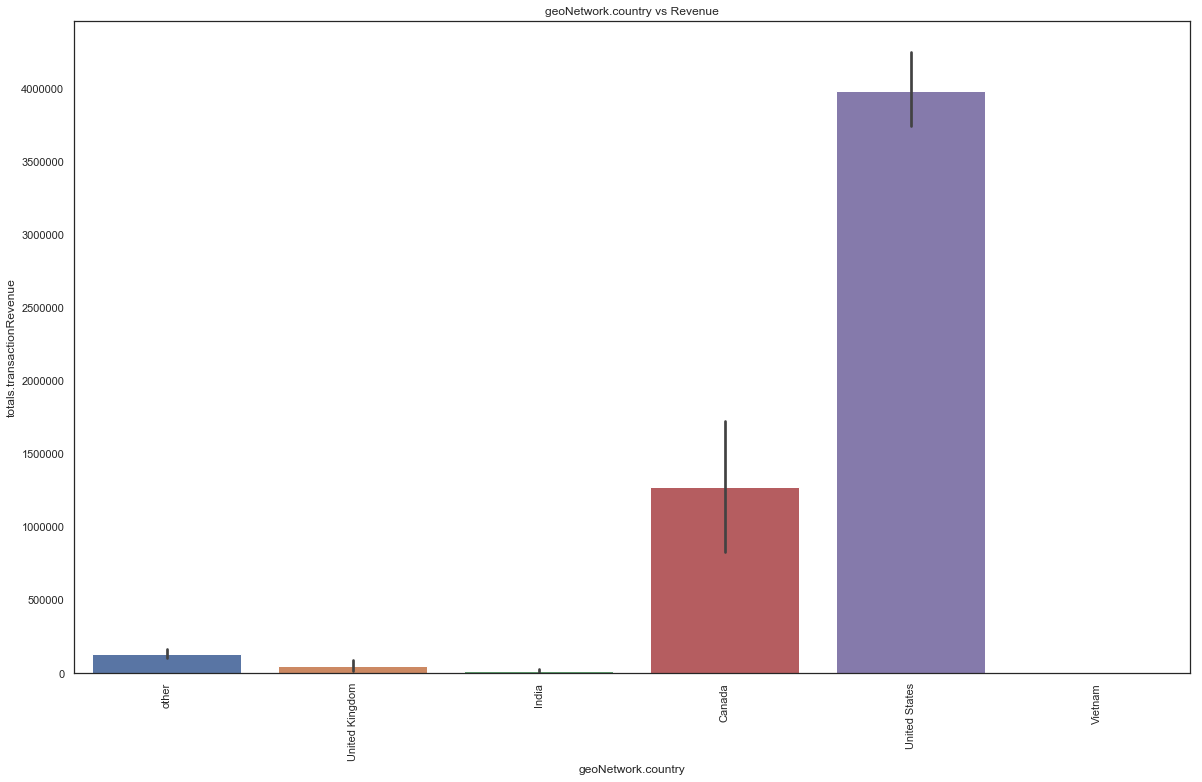

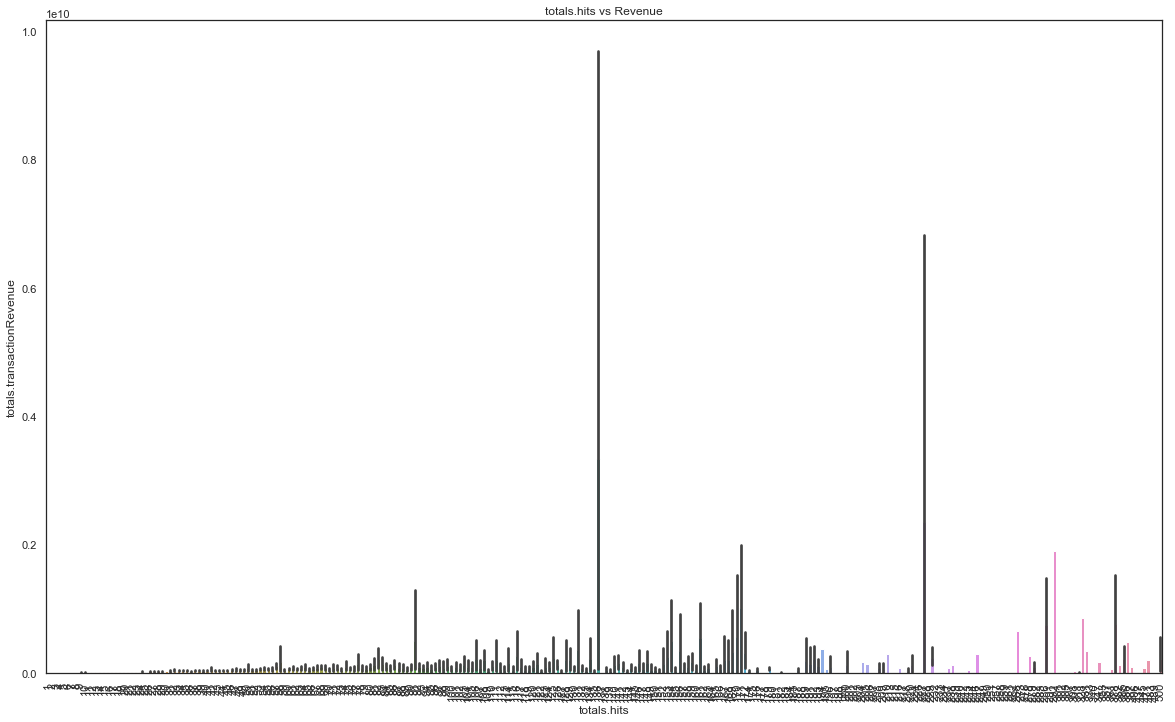

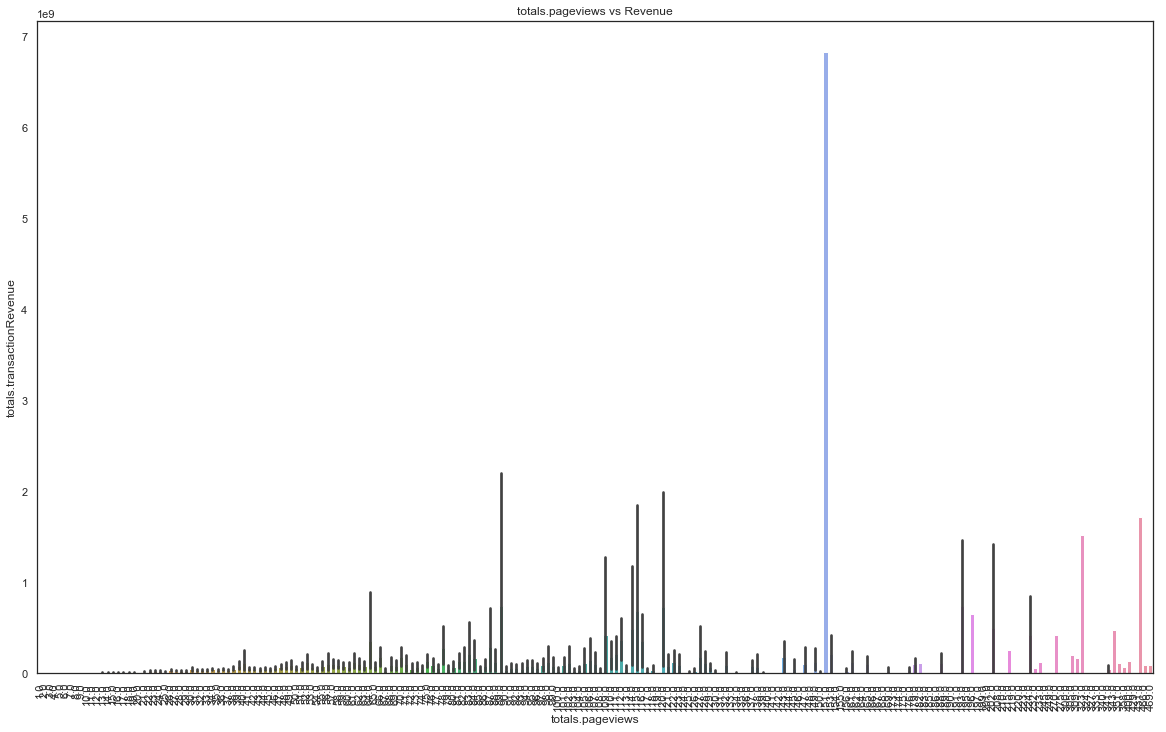

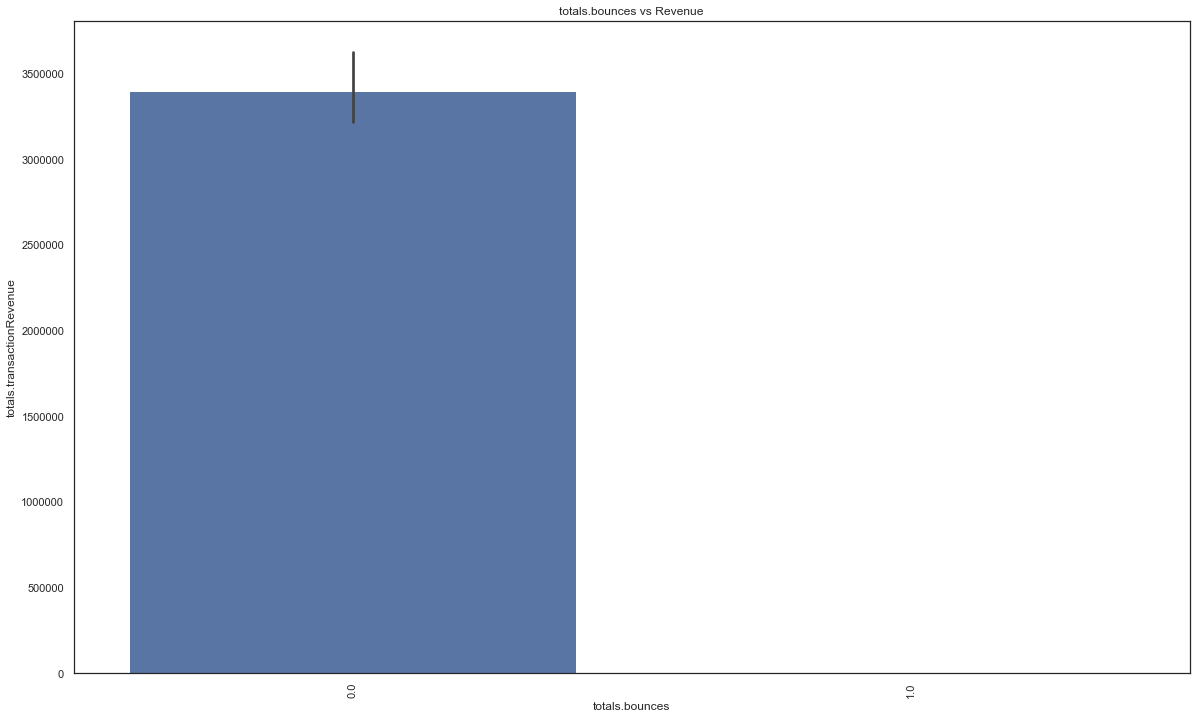

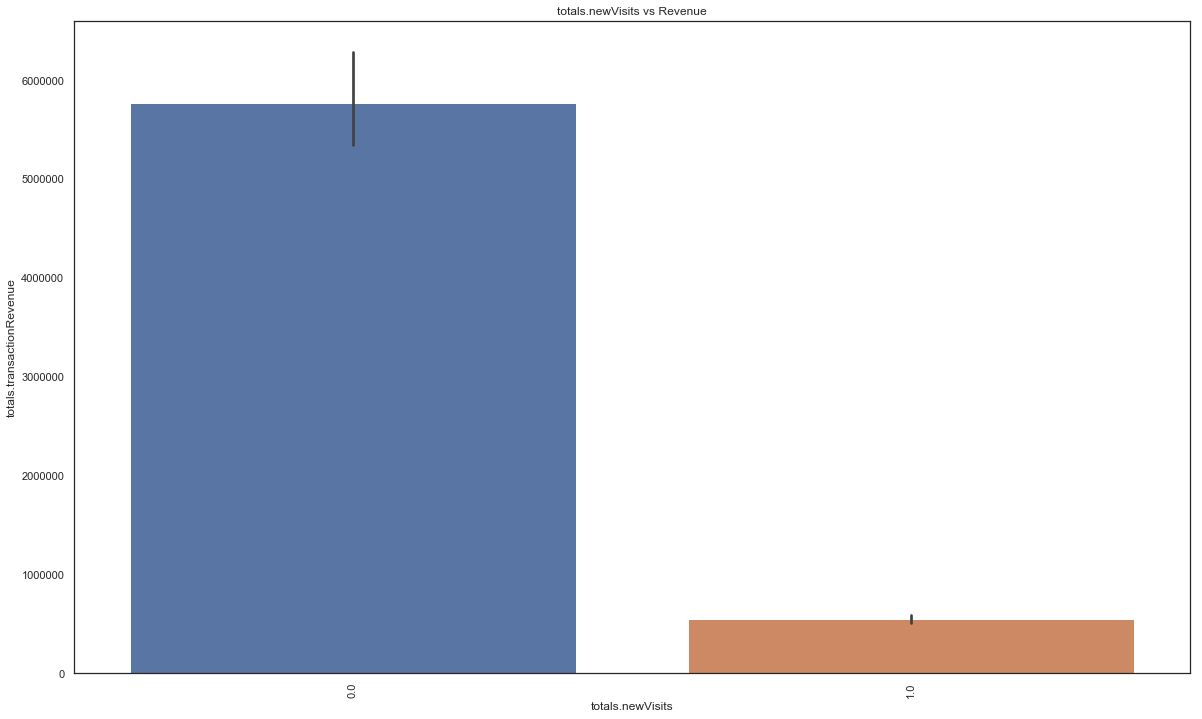

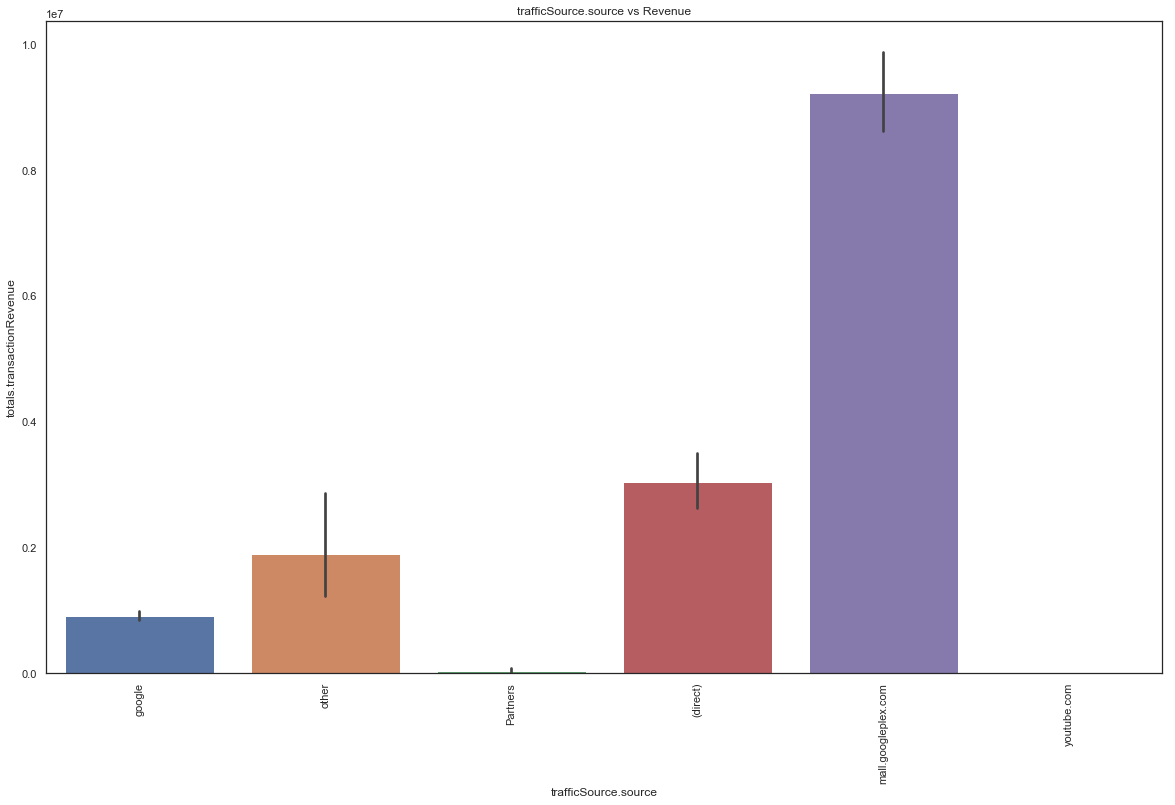

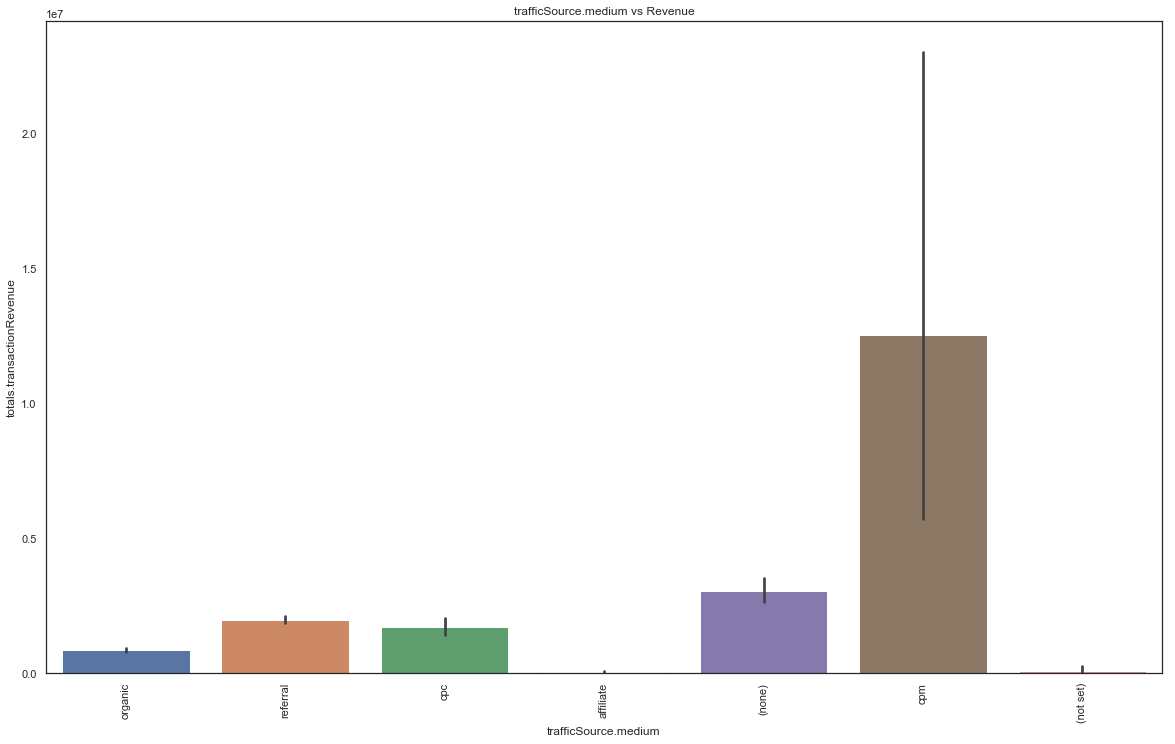

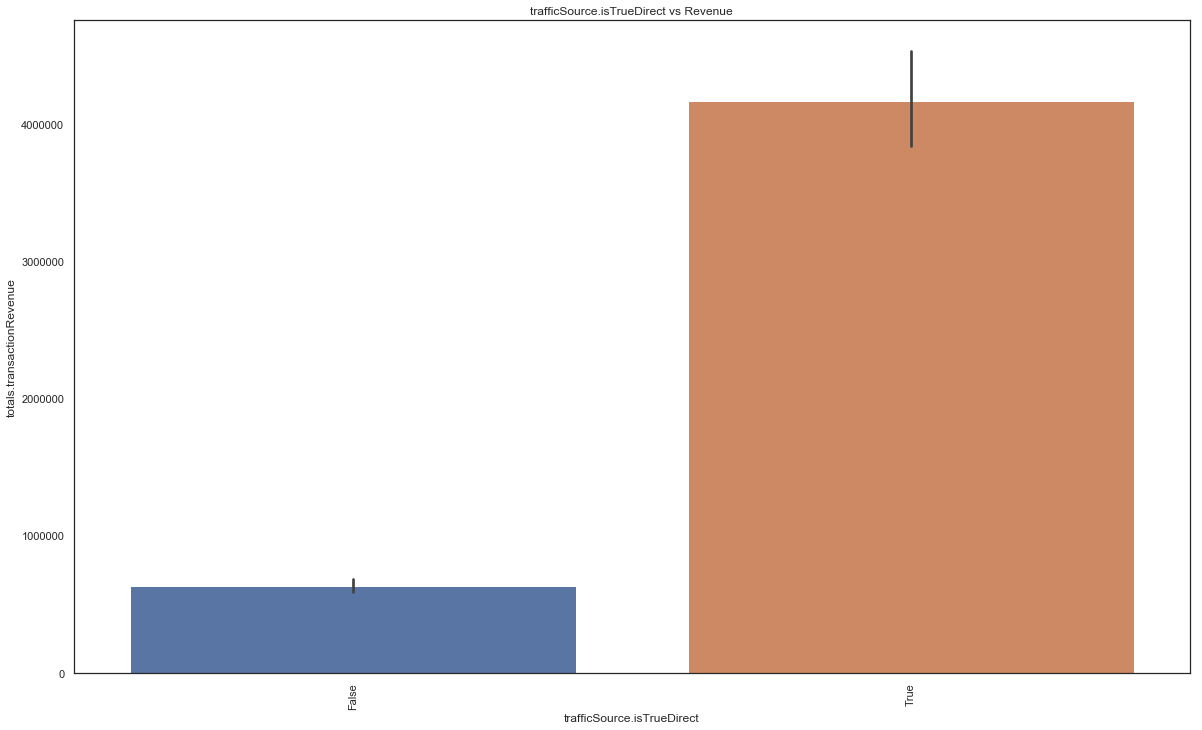

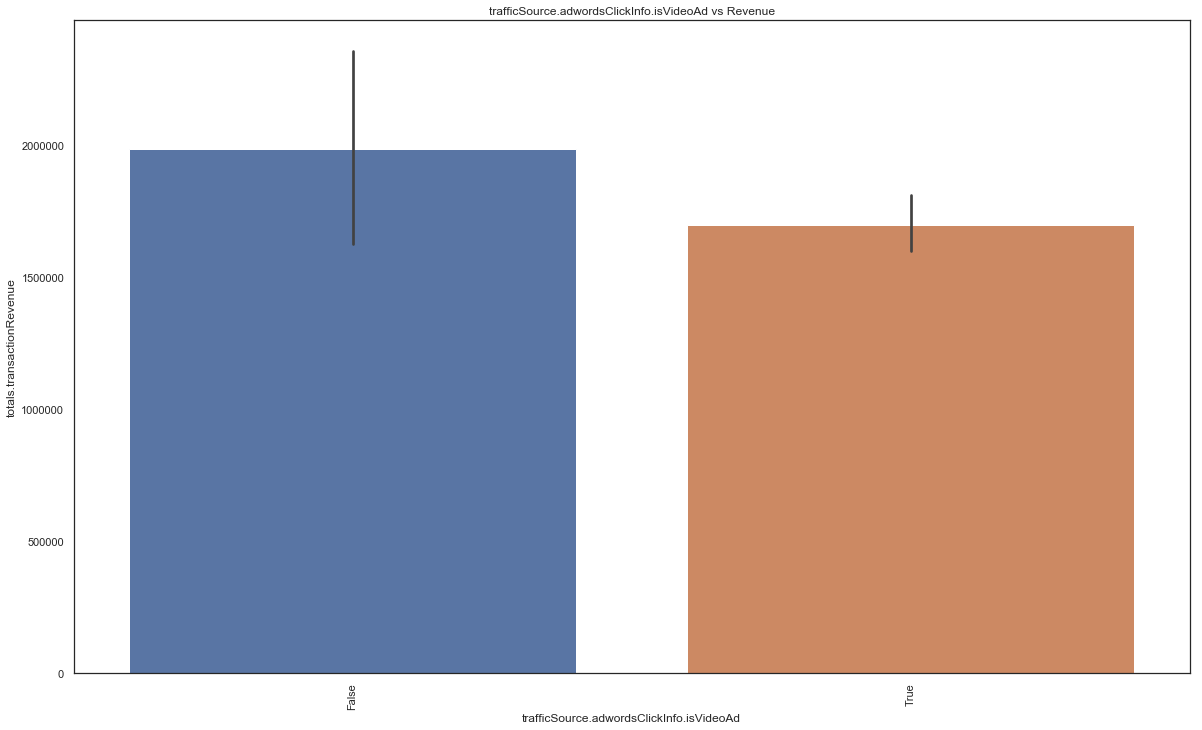

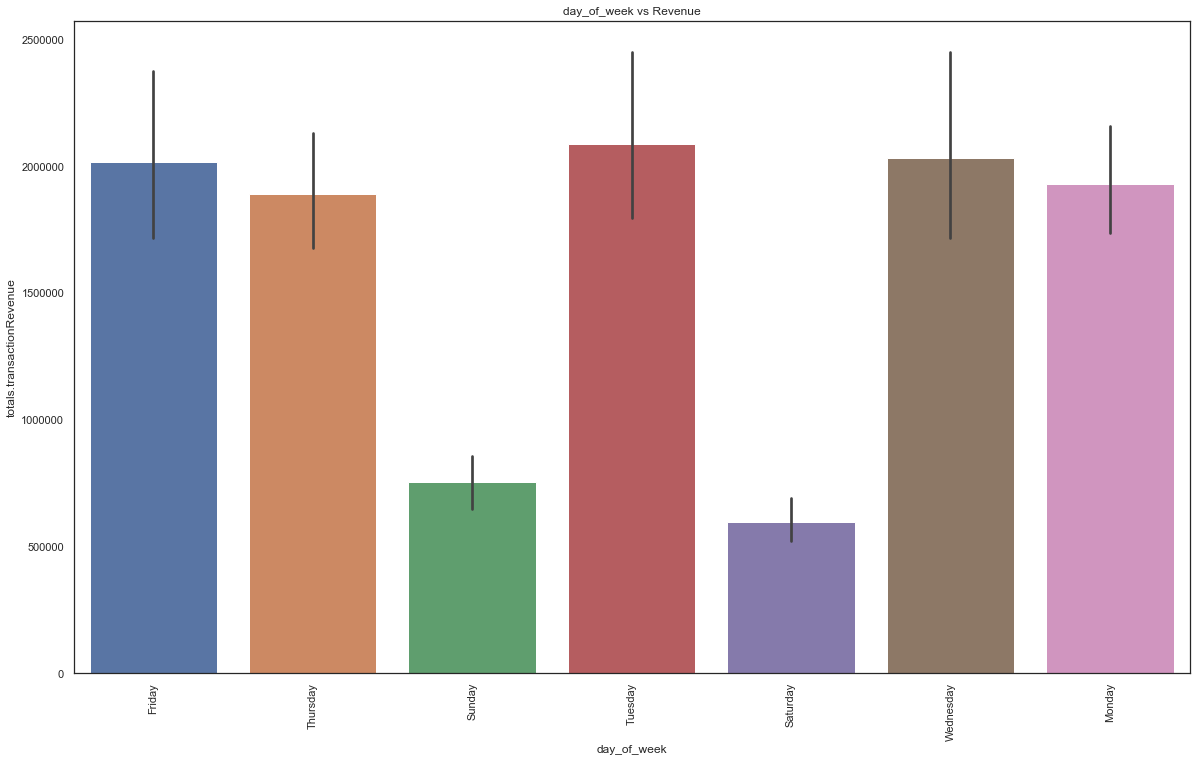

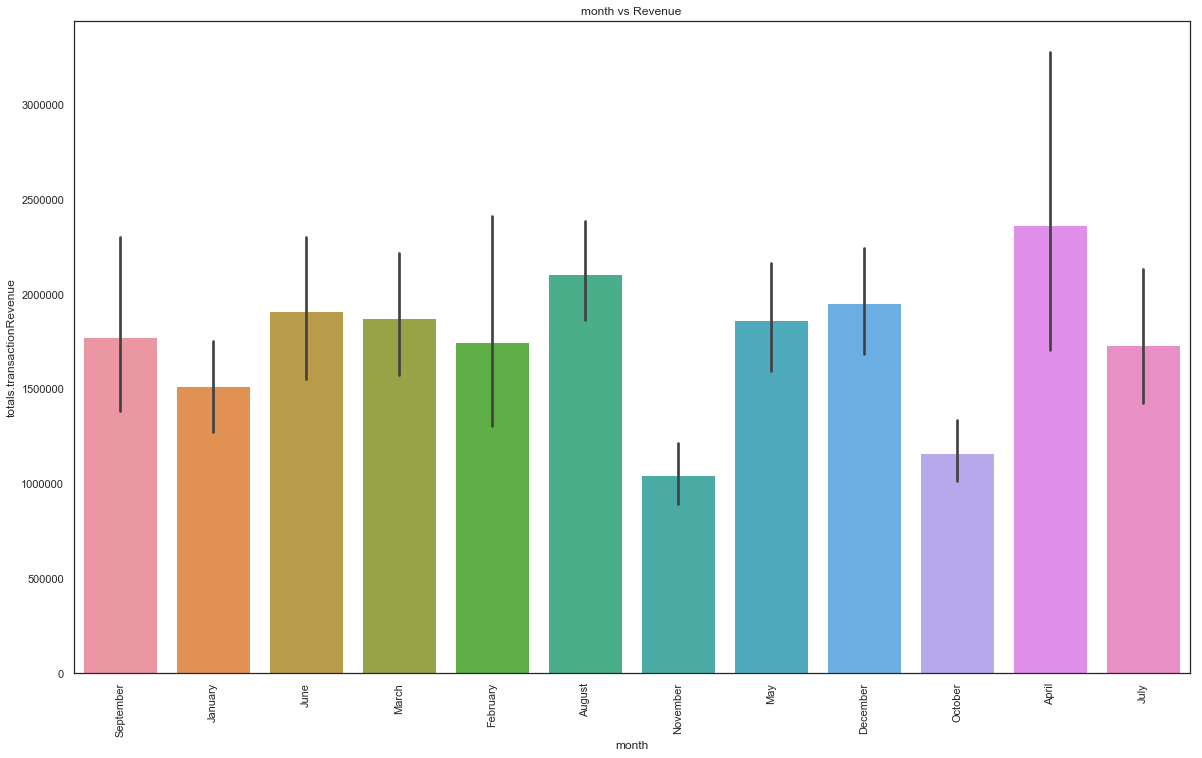

In [126]:
#explore df_train (before one-hot encoding) for initial visualizations 
for column in column_list:
    fig, ax = plt.subplots(figsize=(20,12))
    chart = sns.barplot(x=column, y='totals.transactionRevenue', data=df_train)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.set_title(column+' vs Revenue')

some interesting things to note:
1. most of the revenue occurred during the week and not on weekends
2. more pageviews and hits resulted in more revenue
3. most revenue came from the Americas
4. most revenue came from desktop users 

In [145]:
#look at session count vs revenue % for each feature 

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot

def PieChart(df_colum, title, limit=15):
    """
    This function looks at the percentage of visits and revenue by each variable 
    """

    count_trace = df_train[df_colum].value_counts()[:limit].to_frame().reset_index()
    rev_trace = df_train.groupby(df_colum)["totals.transactionRevenue"].sum().nlargest(10).to_frame().reset_index()

    trace1 = go.Pie(labels=count_trace['index'], values=count_trace[df_colum], name= "% Acesses", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=True,domain= {'x': [0, .48]}, 
                    marker=dict())

    trace2 = go.Pie(labels=rev_trace[df_colum], 
                    values=rev_trace['totals.transactionRevenue'], name="% Revenue", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=False, domain= {'x': [.52, 1]})

    layout = dict(title= title, height=450, font=dict(size=15),
                  annotations = [
                      dict(
                          x=.25, y=.5,
                          text='Visits', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Revenue', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)

In [151]:
for column in column_list:
    PieChart(column, column)

### Modeling to predict revenue per user

#### Correlation of features

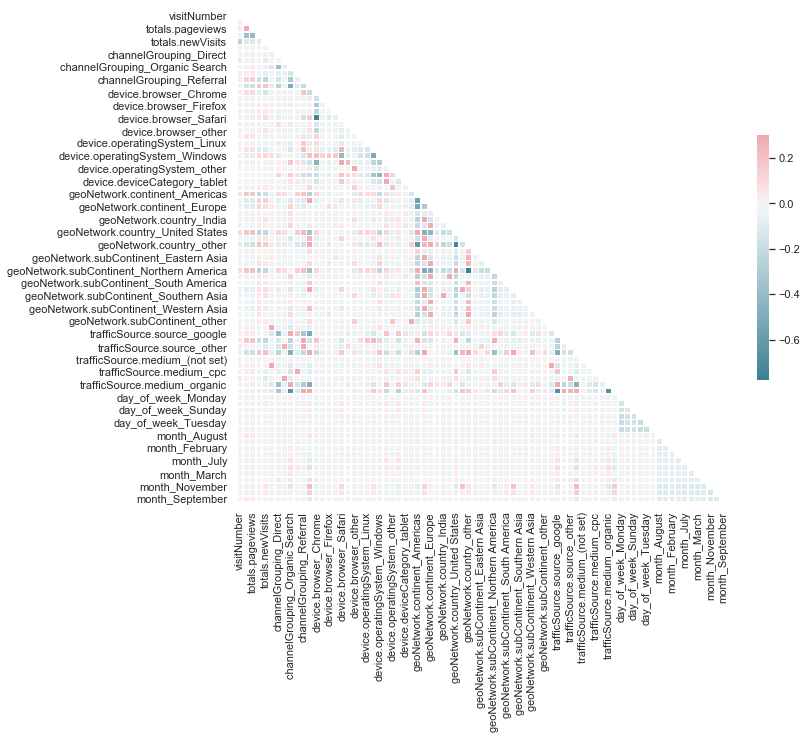

In [29]:
#build a correlation matrix 
from string import ascii_letters

sns.set(style='white')

#compute the correlation matrix
corr = df_train_new.drop(['fullVisitorId', 'totals.transactionRevenue', 'sessionId', 'visitId'], axis=1).corr()

#generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [102]:
#LOOK AT THE VARIABLES THAT HAVE THE HIGHEST CORRELATION
c = df_train_new.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[-131:-87])

geoNetwork.continent_Americas             geoNetwork.country_other                    0.621833
geoNetwork.country_other                  geoNetwork.continent_Americas               0.621833
trafficSource.medium_referral             channelGrouping_Organic Search              0.649875
channelGrouping_Organic Search            trafficSource.medium_referral               0.649875
trafficSource.medium_referral             trafficSource.medium_organic                0.649875
trafficSource.medium_organic              trafficSource.medium_referral               0.649875
trafficSource.medium_referral             trafficSource.source_google                 0.678662
trafficSource.source_google               trafficSource.medium_referral               0.678662
trafficSource.medium_referral             trafficSource.source_youtube.com            0.729637
trafficSource.source_youtube.com          trafficSource.medium_referral               0.729637
geoNetwork.country_United States          geoNetwo

In [31]:
#only object column left is "fullVisitorId"
#5 continuous variables, and 13 categorical variables (before one hot encoding)

#create X and y variables
#take log of revenues and groupby fullVisitorId to obtain revenue per user
X = df_train_new.drop(['fullVisitorId', 'totals.transactionRevenue', 'sessionId', 'visitId'], axis=1)
y = np.log1p(df_train_new['totals.transactionRevenue'])

#standardize the features
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler().fit_transform(X)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### initial Principal Component Analysis (PCA)

In [32]:
#make new dataframe using standardized features 
df = pd.DataFrame(data=standardized, columns = X.columns)
df.head()

#initial PCA exploration 
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=40)
pca_2 = PCA(n_components=50)
pca_3 = PCA(n_components=55)

principalComponents_1 = pca_1.fit_transform(df)
principalComponents_2 = pca_2.fit_transform(df)
principalComponents_3 = pca_3.fit_transform(df)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.862503159931342
0.9709047981506208
0.9926464242276571


#### Train, test, split

In [33]:
#train, test, split data for y_reg
from sklearn.model_selection import train_test_split
#training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

#### Random Forest Model using regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, log_loss

In [35]:
pipe_rf_regr = Pipeline([('scaler', StandardScaler()),
                         ('pca', PCA(n_components=50)),
                         ('regr', RandomForestRegressor(n_estimators=10))])

pipe_rf_regr.fit(X_train, y_train)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [36]:
#look at the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

y_true = y_train
y_pred = pipe_rf_regr.predict(X_train)

mean_squared_error(y_true, y_pred)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.6666837620930841

In [37]:
#check MSE of the val set 
y_true_val = y_val
y_pred_val = pipe_rf_regr.predict(X_val)

mean_squared_error(y_true_val, y_pred_val)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3.4766551037874596

In [38]:
#maybe try this instead of pipe_rf_regr[2]
pipe_rf_regr.steps[2][1]

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

there is a bit of a difference between the train and test MSE which indicates there is some overfitting going on. 

Feature ranking:
1. feature 1 (0.130603)
2. feature 0 (0.088755)
3. feature 47 (0.051597)
4. feature 9 (0.042462)
5. feature 11 (0.025840)
6. feature 44 (0.020347)
7. feature 22 (0.019180)
8. feature 7 (0.017505)
9. feature 21 (0.017148)
10. feature 19 (0.017097)
11. feature 48 (0.016968)
12. feature 31 (0.016345)
13. feature 17 (0.016049)
14. feature 18 (0.015972)
15. feature 14 (0.015793)
16. feature 24 (0.015789)
17. feature 43 (0.015668)
18. feature 33 (0.015598)
19. feature 45 (0.015596)
20. feature 30 (0.015492)
21. feature 20 (0.015412)
22. feature 49 (0.015370)
23. feature 4 (0.015012)
24. feature 16 (0.014837)
25. feature 3 (0.014536)
26. feature 32 (0.014305)
27. feature 15 (0.014273)
28. feature 2 (0.014251)
29. feature 40 (0.014241)
30. feature 41 (0.014188)
31. feature 38 (0.014115)
32. feature 25 (0.014066)
33. feature 28 (0.014040)
34. feature 39 (0.013946)
35. feature 34 (0.013902)
36. feature 13 (0.013876)
37. feature 5 (0.013831)
38. feature 12 (0.013822)
39. feature 

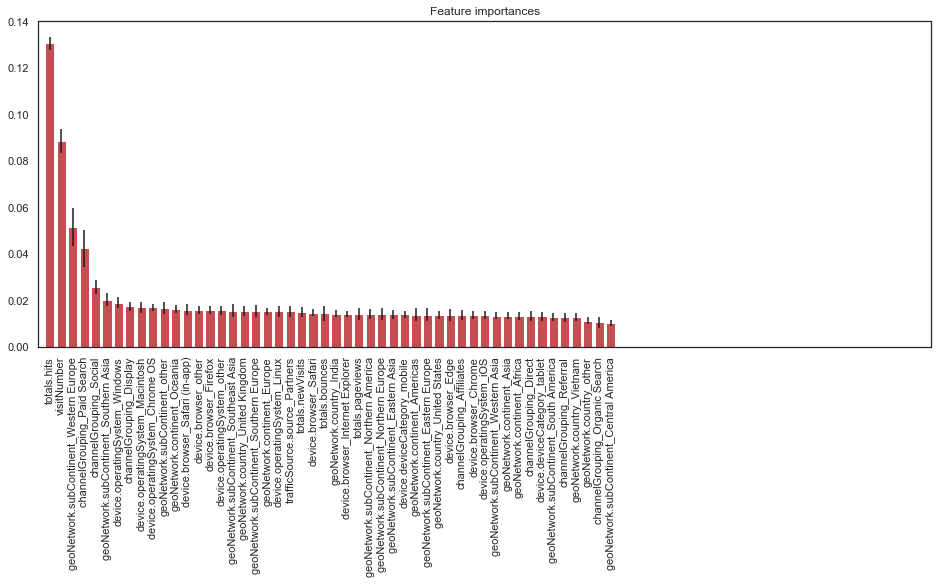

In [39]:
#check feature importances with no hyperparameter tuning or gridsearch

#random forest classifier object variable
rf = pipe_rf_regr.steps[2][1]

importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(50):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(50), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

#### Hyperparameter tuning to reduce overfitting using Grid Search

In [40]:
#set grid search params
param_grid_forest = [
    {'regr__n_estimators': [10, 50],
    'regr__criterion': ['mse'],
    'regr__max_depth': [None, 6],
    'regr__min_samples_split': [2, 3],
    'regr__min_samples_leaf': [1, 2]}
]

#construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf_regr,
                    param_grid=param_grid_forest,
                    scoring='neg_mean_squared_error',
                    cv=3,
                    return_train_score = True)

#fit using grid search
gs_rf.fit(X_train, y_train)

#make predictions
training_preds = gs_rf.predict(X_train)
val_preds = gs_rf.predict(X_val)

#best MSE
print('Best MSE: %.3f' % gs_rf.best_score_)

#best params
print('\nBest params:\n', gs_rf.best_params_)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data wi

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input d

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input d

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data wi

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype

Best MSE: -3.030

Best params:
 {'regr__criterion': 'mse', 'regr__max_depth': 6, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 2, 'regr__n_estimators': 50}


In [44]:
gs_rf.best_estimator_.steps[2][1]

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature ranking:
1. feature 1 (0.411959)
2. feature 0 (0.248968)
3. feature 47 (0.116113)
4. feature 9 (0.071601)
5. feature 11 (0.035381)
6. feature 44 (0.013878)
7. feature 43 (0.012291)
8. feature 12 (0.004881)
9. feature 41 (0.004547)
10. feature 13 (0.004224)
11. feature 2 (0.004065)
12. feature 22 (0.004042)
13. feature 21 (0.003863)
14. feature 34 (0.003836)
15. feature 45 (0.003703)
16. feature 49 (0.003343)
17. feature 48 (0.002781)
18. feature 3 (0.002718)
19. feature 46 (0.002713)
20. feature 6 (0.002707)
21. feature 35 (0.002317)
22. feature 40 (0.002316)
23. feature 31 (0.001895)
24. feature 24 (0.001718)
25. feature 14 (0.001715)
26. feature 38 (0.001708)
27. feature 30 (0.001699)
28. feature 4 (0.001680)
29. feature 26 (0.001655)
30. feature 16 (0.001648)
31. feature 28 (0.001527)
32. feature 15 (0.001471)
33. feature 10 (0.001461)
34. feature 19 (0.001452)
35. feature 8 (0.001444)
36. feature 20 (0.001383)
37. feature 32 (0.001295)
38. feature 29 (0.001294)
39. feature 

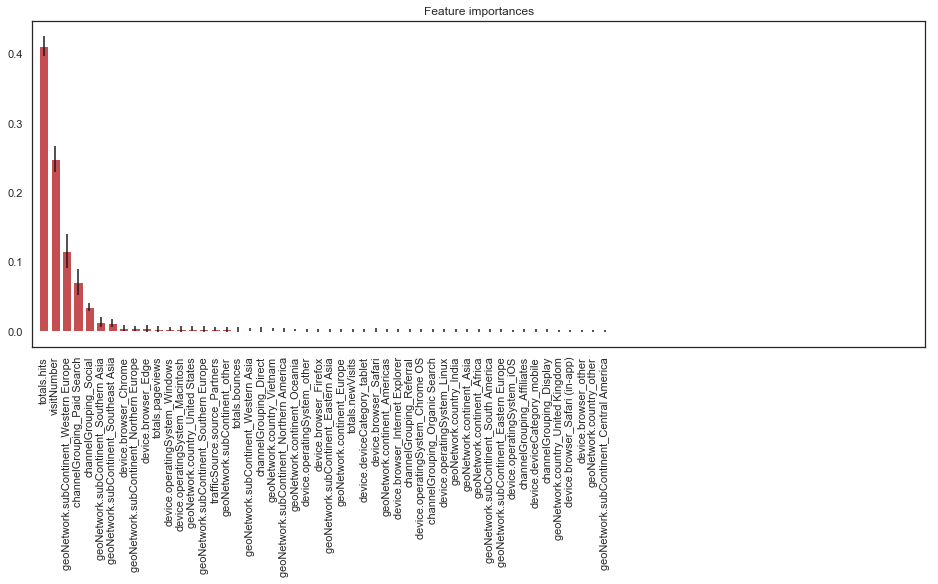

In [43]:
#check feature importances with no hyperparameter tuning or gridsearch

#random forest classifier object variable

importances = gs_rf.best_estimator_.steps[2][1].feature_importances_

std = np.std([tree.feature_importances_ for tree in gs_rf.best_estimator_.steps[2][1].estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(50):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(50), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [53]:
gs_rf.cv_results_['mean_train_score']

array([-0.64283842, -0.50680885, -0.69100985, -0.54951529, -0.91401786,
       -0.78328462, -0.9092372 , -0.78539464, -2.896132  , -2.88365942,
       -2.89597117, -2.88265001, -2.89335922, -2.8840856 , -2.90191727,
       -2.88364562])

In [54]:
gs_rf.cv_results_['mean_test_score']

array([-3.50125444, -3.30346274, -3.49095662, -3.27565632, -3.3673123 ,
       -3.1862189 , -3.3800394 , -3.18849704, -3.05388124, -3.03377247,
       -3.05380708, -3.0312219 , -3.04532727, -3.02976757, -3.04620346,
       -3.03173288])

In [56]:
gs_rf.cv_results_['param_regr__max_depth']

masked_array(data=[None, None, None, None, None, None, None, None, 6, 6,
                   6, 6, 6, 6, 6, 6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object)

#### More Hyperparameter tuning using visualizations of param vs MSE 

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

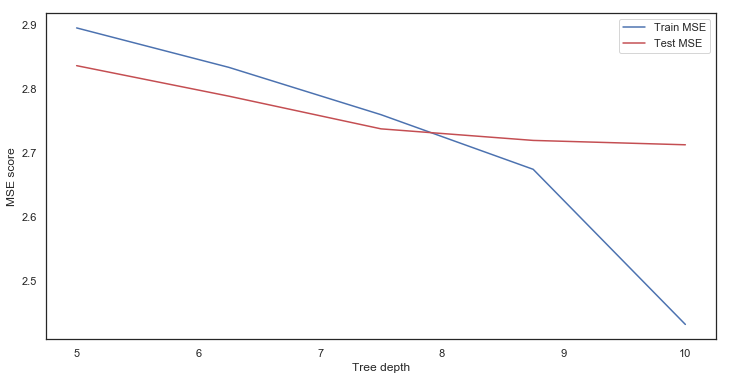

In [65]:
#look at each hyperparameter vs the error

max_depths = np.linspace(5, 10, 5, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestRegressor(criterion='mse', max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   mse = mean_squared_error(y_train, train_pred)
   # Add mse score to previous train results
   train_results.append(mse)
   val_pred = rf.predict(X_val)
   mse = mean_squared_error(y_val, val_pred)
   # Add mse score to previous test results
   test_results.append(mse)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train MSE')
plt.plot(max_depths, test_results, 'r', label='Test MSE')
plt.ylabel('MSE score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

max depth should be 7 or 8 because the test MSE doesn't improve much. The train MSE dropping significantly is the model overfitting. 

In [67]:
n_estimators = [50, 60, 70, 80, 90, 100]
train_results = []
test_results = []
for n_estimator in n_estimators:
   rf = RandomForestRegressor(criterion='mse', n_estimators=n_estimator)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   mse = mean_squared_error(y_train, train_pred)
   # Add mse score to previous train results
   train_results.append(mse)
   val_pred = rf.predict(X_val)
   mse = mean_squared_error(y_val, val_pred)
   # Add mse score to previous test results
   test_results.append(mse)

plt.figure(figsize=(12,6))
plt.plot(n_estimators, train_results, 'b', label='Train MSE')
plt.plot(n_estimators, test_results, 'r', label='Test MSE')
plt.ylabel('MSE score')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

KeyboardInterrupt: 

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

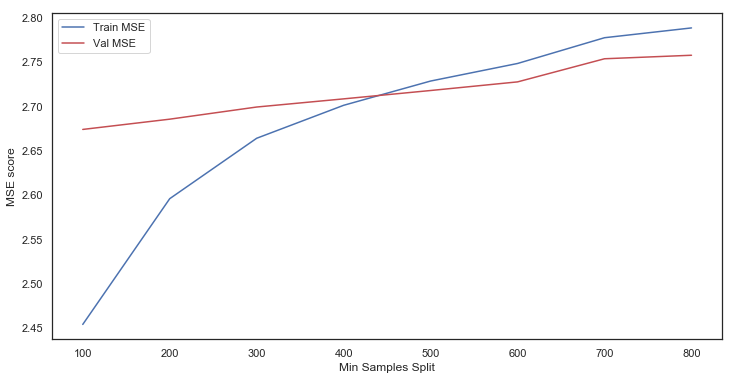

In [87]:
min_samples_split = [100, 200, 300, 400, 500, 600, 700, 800]
train_results = []
val_results = []
for min_sample in min_samples_split:
   rf = RandomForestRegressor(criterion='mse', min_samples_split=min_sample)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   mse = mean_squared_error(y_train, train_pred)
   # Add mse score to previous train results
   train_results.append(mse)
   val_pred = rf.predict(X_val)
   mse = mean_squared_error(y_val, val_pred)
   # Add mse score to previous test results
   val_results.append(mse)

plt.figure(figsize=(12,6))
plt.plot(min_samples_split, train_results, 'b', label='Train MSE')
plt.plot(min_samples_split, val_results, 'r', label='Val MSE')
plt.ylabel('MSE score')
plt.xlabel('Min Samples Split')
plt.legend()
plt.show()

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


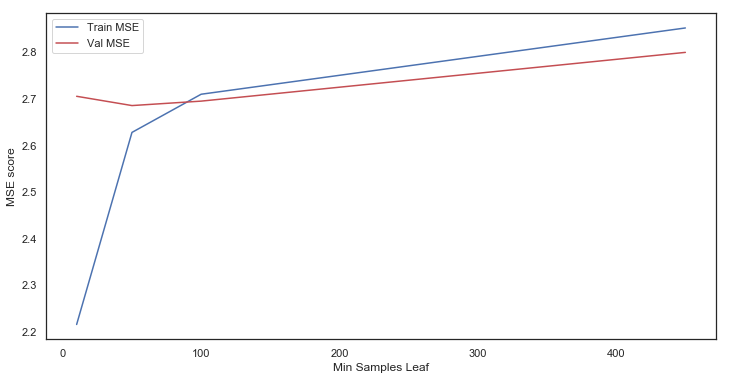

In [90]:
min_samples_leaf = [10, 50, 100, 450]
train_results = []
val_results = []
for min_sample in min_samples_leaf:
   rf = RandomForestRegressor(criterion='mse', min_samples_leaf=min_sample)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   mse = mean_squared_error(y_train, train_pred)
   # Add mse score to previous train results
   train_results.append(mse)
   val_pred = rf.predict(X_val)
   mse = mean_squared_error(y_val, val_pred)
   # Add mse score to previous test results
   val_results.append(mse)

plt.figure(figsize=(12,6))
plt.plot(min_samples_leaf, train_results, 'b', label='Train MSE')
plt.plot(min_samples_leaf, val_results, 'r', label='Val MSE')
plt.ylabel('MSE score')
plt.xlabel('Min Samples Leaf')
plt.legend()
plt.show()

In [91]:
val_results

[2.7056278783446137, 2.685701925803102, 2.695244915228266, 2.7999003233250725]

min samples leaf should be around 50 to 100

#### New Random Forest Regressor after tuning 

In [93]:
#try a new model after more hyperparameter tuning exploration:

pipe_rf_regr_final = Pipeline([('scaler', StandardScaler()),
                               ('pca', PCA(n_components=50)),
                               ('regr', RandomForestRegressor(n_estimators=100,
                                                              criterion='mse',
                                                              max_depth=8,
                                                              min_samples_split=450,
                                                              min_samples_leaf=50))])

pipe_rf_regr_final.fit(X_train, y_train)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_fea...tors=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [95]:
#check MSE of train set
y_true = y_train
y_pred = pipe_rf_regr_final.predict(X_train)

mean_squared_error(y_true, y_pred)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.8613270105757938

In [96]:
#check MSE of validation set
y_true_val = y_val
y_pred_val = pipe_rf_regr_final.predict(X_val)

mean_squared_error(y_true_val, y_pred_val)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.882543615027361

In [113]:
#check out the test set now. 
y_true_test = y_test
y_pred_test = pipe_rf_regr_final.predict(X_test)

mean_squared_error(y_true_test, y_pred_test)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.8780898203340826

In [160]:
from sklearn.metrics import r2_score

r2_score(y_true_test, y_pred_test)

0.2575832869176815

### way less overfitting! the MSE is almost the same for the train and validation sets

Feature ranking:
1. feature 1 (0.390090)
2. feature 0 (0.248281)
3. feature 47 (0.105564)
4. feature 9 (0.089589)
5. feature 11 (0.034908)
6. feature 44 (0.013403)
7. feature 7 (0.011544)
8. feature 3 (0.011254)
9. feature 43 (0.010336)
10. feature 21 (0.006078)
11. feature 2 (0.004880)
12. feature 41 (0.004425)
13. feature 38 (0.004379)
14. feature 12 (0.004302)
15. feature 13 (0.004254)
16. feature 5 (0.004239)
17. feature 22 (0.004049)
18. feature 34 (0.003393)
19. feature 8 (0.003273)
20. feature 6 (0.003146)
21. feature 45 (0.003145)
22. feature 4 (0.002804)
23. feature 40 (0.002634)
24. feature 48 (0.002448)
25. feature 49 (0.002143)
26. feature 15 (0.001916)
27. feature 46 (0.001916)
28. feature 14 (0.001809)
29. feature 20 (0.001410)
30. feature 35 (0.001300)
31. feature 26 (0.001275)
32. feature 27 (0.001236)
33. feature 23 (0.001203)
34. feature 29 (0.001185)
35. feature 42 (0.001158)
36. feature 39 (0.001142)
37. feature 30 (0.001128)
38. feature 10 (0.000964)
39. feature 32

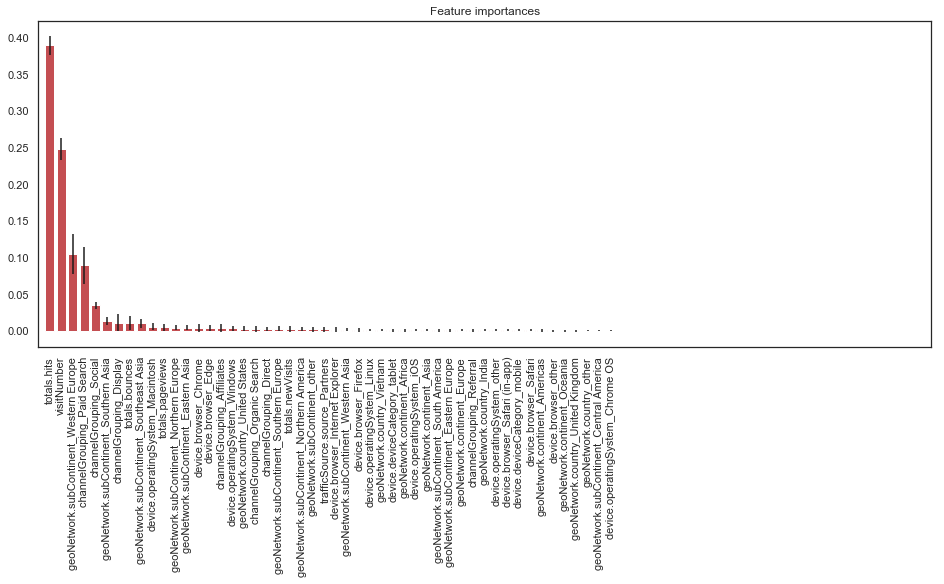

In [97]:
#check feature importances with no hyperparameter tuning or gridsearch

#random forest classifier object variable
rf = pipe_rf_regr_final.steps[2][1]

importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(50):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(50), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

### top 5 features explain over 76% of the variance of this model - try a random forest regressor with just these 5 features

In [108]:
#create new X with just the top 5 feature importances
X_five = df_train_new[['totals.hits', 'visitNumber', 'geoNetwork.subContinent_Western Europe',
                      'channelGrouping_Paid Search', 'channelGrouping_Social']]

In [109]:
#training set
X_train_five, X_test_five, y_train_five, y_test_five = train_test_split(X_five, y, test_size=0.2, random_state=123)
#validation set
X_train_five, X_val_five, y_train_five, y_val_five = train_test_split(X_train_five, y_train_five, test_size=0.2, random_state=123)

In [110]:
pipe_rf_regr_five = Pipeline([('scaler', StandardScaler()),
                               ('regr', RandomForestRegressor(n_estimators=100,
                                                              criterion='mse',
                                                              max_depth=8,
                                                              min_samples_split=450,
                                                              min_samples_leaf=50))])

pipe_rf_regr_five.fit(X_train_five, y_train_five)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=450,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [111]:
y_true_five = y_train_five
y_pred_five = pipe_rf_regr_five.predict(X_train_five)

mean_squared_error(y_true_five, y_pred_five)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3.1745124177154826

In [112]:
y_true_val_five = y_val_five
y_pred_val_five = pipe_rf_regr_five.predict(X_val_five)

mean_squared_error(y_true_val_five, y_pred_val_five)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3.1302531932532975

### Interpret the results and make a business recommendation

#### Using only 5 features we have a MSE that is almost as low as using 50 features! Validation MSE is 3.13 vs 2.88. This is about an 8% decrease in MSE using a lot less resources to collect data and time to run the models with more data.

### What else would I do with more time/resources? 

If I had access to cloud computing services like AWS I could run more complex grid searches to tune my parameters even more. Each grid search took over 2 hours to run on my local computer. 

Also, could have tried XGBoost or a similar gradient boosting algorithm which usually has pretty good results for regression analysis. 

Try to eliminate more features that are highly correlated in future models. There is a lot of correlation between the location features. Also try adding an hour feature. The only reason I didnt was because it would have been 24 extra columns after one-hot encoding.

# Conclusion:

Models chosen to Tune: I decided to go with Random Forest Regression because it was a powerful ensemble method that can produce some accurate predictions.

Based on the mean squared error (MSE) of 2.88, and r_2 of 25%, it doesn't do the best job predicting revenues. There were some other people on Kaggle that used various gradient boosting algorithms that got their MSE down to 1.5, but it seems their model had some serious overfitting going on. 

My model seems to be normally distributed and well fit even if the error and accuracy isn't the best. I also would strongly recommend a business to just pay for resources to collect the 5 most important features because the accuracy is only 8% lower. The cost of collecting the data of 50+ features and running a model with 50+ features could be very expensive. It also took my random forest grid search over 2 hours to run, but when I used just 5 features it would run in less than 5 minutes.